In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
!pip install pmdarima==1.8.0

     |████████████████████████████████| 1.5MB 8.2MB/s 
     |████████████████████████████████| 9.5MB 24.9MB/s 
     |████████████████████████████████| 2.1MB 42.0MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: Cython 0.29.22
    Uninstalling Cython-0.29.22:
      Successfully uninstalled Cython-0.29.22


In [4]:
!pip install scikit-learn==0.24

     |████████████████████████████████| 22.3MB 1.6MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [5]:
filename = "/content/gdrive/My Drive/BITS/4-2/ASM_sop/TamilNadu1/dataset.csv"
# The data of all the files from year 2000-2014 of AP have been combined and put into one file called Dataset
df = pd.read_csv(filename)
df=df.iloc[:,:17]
df

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Snow Depth
0,2000,1,1,0,0,0,0,0,0,0,0,21,22.361598,951.069824,94.747772,166.221817,0
1,2000,1,1,1,0,0,0,0,0,0,0,21,22.113735,950.670105,94.587796,158.952849,0
2,2000,1,1,2,0,0,0,0,0,0,0,21,21.932924,950.084168,94.527398,146.731555,0
3,2000,1,1,3,0,0,0,0,0,0,0,20,21.802145,949.915283,94.564467,133.338946,0
4,2000,1,1,4,0,0,0,0,0,0,0,20,21.677566,950.238098,94.428675,119.610011,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131395,2014,12,31,19,0,0,0,0,0,0,0,23,23.942629,949.792664,95.038603,109.027520,0
131396,2014,12,31,20,0,0,0,0,0,0,0,22,23.816937,950.480530,95.051303,122.815953,0
131397,2014,12,31,21,0,0,0,0,0,0,0,22,23.651271,950.498596,95.063357,136.493751,0
131398,2014,12,31,22,0,0,0,0,0,0,0,22,23.463472,950.312073,94.849659,149.723659,0


In [6]:
df['Date']=df['Year'].astype(str) + df['Month'].astype(str).str.zfill(2) + df['Day'].astype(str).str.zfill(2) + df['Hour'].astype(str).str.zfill(2)+df['Minute'].astype(str)

df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d%H%M')
df.head(24)

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Snow Depth,Date
0,2000,1,1,0,0,0,0,0,0,0,0,21,22.361598,951.069824,94.747772,166.221817,0,2000-01-01 00:00:00
1,2000,1,1,1,0,0,0,0,0,0,0,21,22.113735,950.670105,94.587796,158.952849,0,2000-01-01 01:00:00
2,2000,1,1,2,0,0,0,0,0,0,0,21,21.932924,950.084168,94.527398,146.731555,0,2000-01-01 02:00:00
3,2000,1,1,3,0,0,0,0,0,0,0,20,21.802145,949.915283,94.564467,133.338946,0,2000-01-01 03:00:00
4,2000,1,1,4,0,0,0,0,0,0,0,20,21.677566,950.238098,94.428675,119.610011,0,2000-01-01 04:00:00
5,2000,1,1,5,0,0,0,0,0,0,0,16,18.991073,951.739258,88.086527,105.737471,0,2000-01-01 05:00:00
6,2000,1,1,6,0,0,0,0,0,0,0,16,19.082109,952.528564,86.906296,92.034323,0,2000-01-01 06:00:00
7,2000,1,1,7,0,78,302,138,71,355,141,17,20.282244,953.285584,81.499087,78.560168,0,2000-01-01 07:00:00
8,2000,1,1,8,0,147,468,341,117,611,370,17,22.268241,953.526489,73.018861,65.523141,0,2000-01-01 08:00:00
9,2000,1,1,9,0,184,587,535,143,737,584,17,23.986125,953.256287,66.480553,53.289244,0,2000-01-01 09:00:00


In [7]:
X=df[['Date','GHI']]
X.set_index('Date',inplace=True)
X.head(24)

,GHI
Date,
2000-01-01 00:00:00,0
2000-01-01 01:00:00,0
2000-01-01 02:00:00,0
2000-01-01 03:00:00,0
2000-01-01 04:00:00,0
2000-01-01 05:00:00,0
2000-01-01 06:00:00,0
2000-01-01 07:00:00,138
2000-01-01 08:00:00,341


In [8]:
X=X.between_time('08:00','17:00',include_start=True,include_end=True)
X=X.reset_index()
X.head(24)

,Date,GHI
0,2000-01-01 08:00:00,341
1,2000-01-01 09:00:00,535
2,2000-01-01 10:00:00,692
3,2000-01-01 11:00:00,851
4,2000-01-01 12:00:00,860
5,2000-01-01 13:00:00,834
6,2000-01-01 14:00:00,707
7,2000-01-01 15:00:00,425
8,2000-01-01 16:00:00,314
9,2000-01-01 17:00:00,74


In [9]:
y=X.resample('D',on='Date').mean()
y

,GHI
Date,
2000-01-01,563.3
2000-01-02,588.0
2000-01-03,325.7
2000-01-04,573.9
2000-01-05,572.7
...,...
2014-12-27,428.9
2014-12-28,447.0
2014-12-29,516.3


In [10]:
X_train=y[:'2011']
X_test=y['2012':]

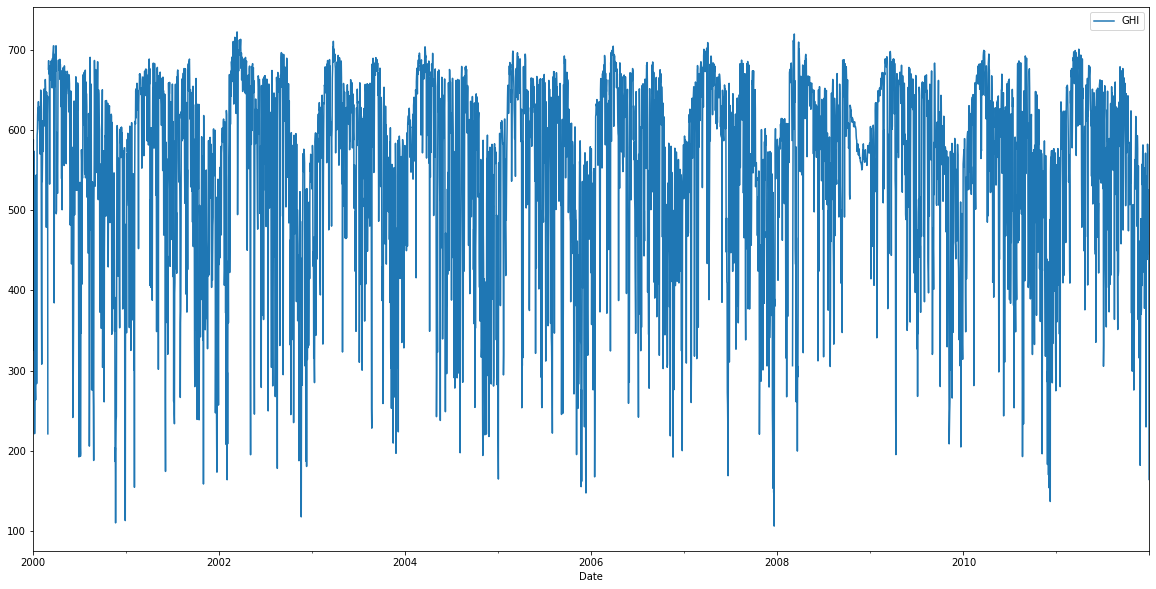

In [11]:
X_train.plot(figsize=(20,10))

In [12]:
TrainDF=pd.DataFrame(X_train)
TrainDF=TrainDF.reset_index()

In [13]:
TrainDF=TrainDF.dropna()
TrainDF=TrainDF.reset_index()

In [14]:
del TrainDF['index']
TrainDF

,Date,GHI
0,2000-01-01,563.3
1,2000-01-02,588.0
2,2000-01-03,325.7
3,2000-01-04,573.9
4,2000-01-05,572.7
...,...,...
4375,2011-12-27,446.2
4376,2011-12-28,520.9
4377,2011-12-29,525.3
4378,2011-12-30,442.1


In [15]:
TrainDF.plot(figsize=(20,10))

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f57ea6b1d40> (for post_execute):


ValueError: ignored

ValueError: ignored

In [16]:
TrainDataFinal=[]
for i in range(5):
  newFoo=TrainDF[i::5]
  newFoo.set_index('Date',inplace=True)
  TrainDataFinal.append(newFoo)
TrainDataFinal

[              GHI
 Date             
 2000-01-01  563.3
 2000-01-06  375.6
 2000-01-11  263.4
 2000-01-16  467.2
 2000-01-21  623.3
 ...           ...
 2011-12-07  581.6
 2011-12-12  553.0
 2011-12-17  571.3
 2011-12-22  509.8
 2011-12-27  446.2
 
 [876 rows x 1 columns],               GHI
 Date             
 2000-01-02  588.0
 2000-01-07  221.3
 2000-01-12  506.0
 2000-01-17  593.6
 2000-01-22  635.6
 ...           ...
 2011-12-08  542.8
 2011-12-13  377.7
 2011-12-18  440.7
 2011-12-23  438.7
 2011-12-28  520.9
 
 [876 rows x 1 columns],               GHI
 Date             
 2000-01-03  325.7
 2000-01-08  283.9
 2000-01-13  544.0
 2000-01-18  598.6
 2000-01-23  612.2
 ...           ...
 2011-12-09  435.1
 2011-12-14  463.8
 2011-12-19  229.7
 2011-12-24  534.9
 2011-12-29  525.3
 
 [876 rows x 1 columns],               GHI
 Date             
 2000-01-04  573.9
 2000-01-09  272.5
 2000-01-14  477.0
 2000-01-19  619.0
 2000-01-24  629.7
 ...           ...
 2011-12-10  423.1
 2011-12-1

In [17]:
from pmdarima.arima import ARIMA

predictions=[]
for i in range(5):
  stepwise_model = ARIMA(order=(1,1,0),seasonal_order=(1,1,0,73))
  stepwise_model.fit(TrainDataFinal[i])
  print(stepwise_model.summary())
  pred=stepwise_model.predict(n_periods=219)
  predictions.append(pred)
predictions

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  876
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 73)   Log Likelihood               -5154.357
Date:                            Thu, 29 Apr 2021   AIC                          10316.714
Time:                                    19:08:33   BIC                          10335.462
Sample:                                         0   HQIC                         10323.915
                                            - 876                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.1799      5.522     -0.033      0.974     -11.004      10.644
ar.L1         -0.4466      0.028   

[array([581.4753224 , 573.32027566, 561.59554082, 435.78431212,
        589.64939699, 543.84986835, 614.07803731, 635.10339224,
        607.38533371, 626.06145852, 616.91160313, 660.42746336,
        669.56783537, 671.14753616, 637.07247372, 686.6219755 ,
        692.21230028, 666.74714409, 687.53803943, 664.41019718,
        587.28492056, 576.61324854, 588.65140779, 518.25876274,
        592.46053784, 623.5274489 , 640.98213069, 608.99347185,
        508.18744177, 583.95615061, 639.51084139, 482.92376526,
        535.99015609, 568.1211504 , 633.56815733, 475.2940947 ,
        655.48904205, 343.44769128, 576.70918239, 528.4993601 ,
        497.98634532, 374.81027008, 493.86139268, 503.57485849,
        600.07062605, 661.25838278, 573.00601304, 511.54390161,
        519.28211366, 575.5523419 , 664.16535968, 512.66338196,
        652.43785596, 607.15528927, 532.75764219, 496.32454435,
        592.73685393, 603.70269377, 593.06935382, 472.26119005,
        468.30231982, 420.34111904, 442.

In [18]:
results=[]
for j in range(len(predictions[0])):
  for i in range(5):
    results.append(predictions[i][j])
results

[581.4753224001033,
 661.8487115793794,
 629.3904326864756,
 674.8164615639159,
 306.4130301834691,
 573.3202756582313,
 697.7368687284866,
 710.9054275571661,
 540.900901432131,
 102.6112733552655,
 561.5955408187064,
 606.994819097626,
 547.6149015552858,
 621.8818617510035,
 218.37862969241465,
 435.78431211990755,
 689.5272744802857,
 750.2715047949773,
 699.2911881525744,
 343.0363027038026,
 589.6493969877341,
 740.4770383227456,
 777.9646853707396,
 724.1863140622904,
 341.17570089483985,
 543.849868350787,
 646.8034286681327,
 698.2040186247197,
 722.466572720263,
 261.1887754707342,
 614.0780373055069,
 684.2149952106626,
 754.6490381239483,
 717.8514354759989,
 335.0968646694275,
 635.1033922362892,
 741.1001766477524,
 705.7668859102223,
 749.8374190439463,
 327.54923542656263,
 607.385333711683,
 558.9807403097021,
 785.9899414596608,
 744.9947642748028,
 386.8036425902719,
 626.0614585173122,
 759.1113683993051,
 719.9820421274744,
 640.3498696288789,
 323.70499674626984,


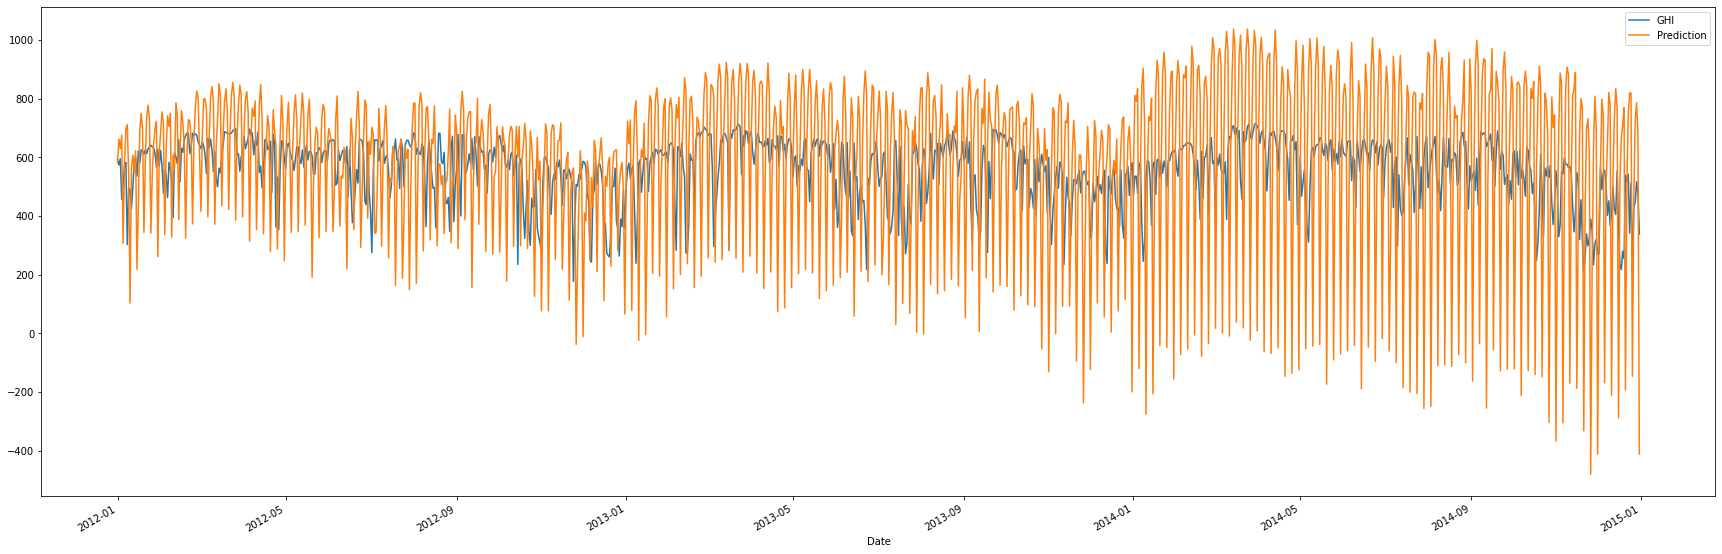

In [19]:
X_test=X_test.dropna()
Finalresults = pd.DataFrame(results,index = X_test[:1095].index,columns=['Prediction'])
pd.concat([X_test[:1095],Finalresults],axis=1).plot(figsize=(30,10))

In [ ]:
len(results)

1095

In [ ]:
Finalresults

,Prediction
Date,
2012-01-01,561.833762
2012-01-02,563.852391
2012-01-03,560.782831
2012-01-04,353.498675
2012-01-05,412.288085
...,...
2014-12-27,599.700574
2014-12-28,649.486240
2014-12-29,664.690736


In [20]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X_test[:1095],Finalresults ,squared=False)

308.5745782126982

In [21]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(X_test,Finalresults)

0.48333489664867757

In [ ]:
Finalresults.to_csv('/content/gdrive/My Drive/BITS/4-2/ASM_sop/Code/TamilNadu1/SARIMAdaily.csv')